In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests
from io import StringIO
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
response = requests.get(url,verify=False)
df = pd.read_csv(StringIO(response.text))
df.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# no of duplicate rows
print("number of duplicate rows:",df.duplicated().sum())
#  display first few duplicate rows
dup_df = df[df.duplicated()]
print("fisrt few duplicate rows:", dup_df.head())

number of duplicate rows: 20
fisrt few duplicate rows:        ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open

In [ ]:
# duplicate rows basec on specific columns
subset_columns = ['MainBranch','Employment','RemoteWork']
dupe_rows = df[df.duplicated(subset = subset_columns,keep =False)]
print("duplicate rows basec on specific columns:",dupe_rows.head())

duplicate rows basec on specific columns:    ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               

In [ ]:
# 
grouped = dupe_rows.groupby(subset_columns)
freq_identical ={}
for col in df.columns:
    identical_groups = sum([group[col].nunique() == 1 for _,group in grouped])
    freq_identical[col] = identical_groups
top_identical = sorted(freq_identical.items(), key=lambda x: x[1], reverse=True)[:5]
print("Columns frquently identical in duplicate rows:")
for col, count in top_identical:
    print(f"{col}: {count} identical groups")

Columns frquently identical in duplicate rows:
MainBranch: 319 identical groups
Employment: 319 identical groups
RemoteWork: 319 identical groups
Check: 319 identical groups
ICorPM: 97 identical groups


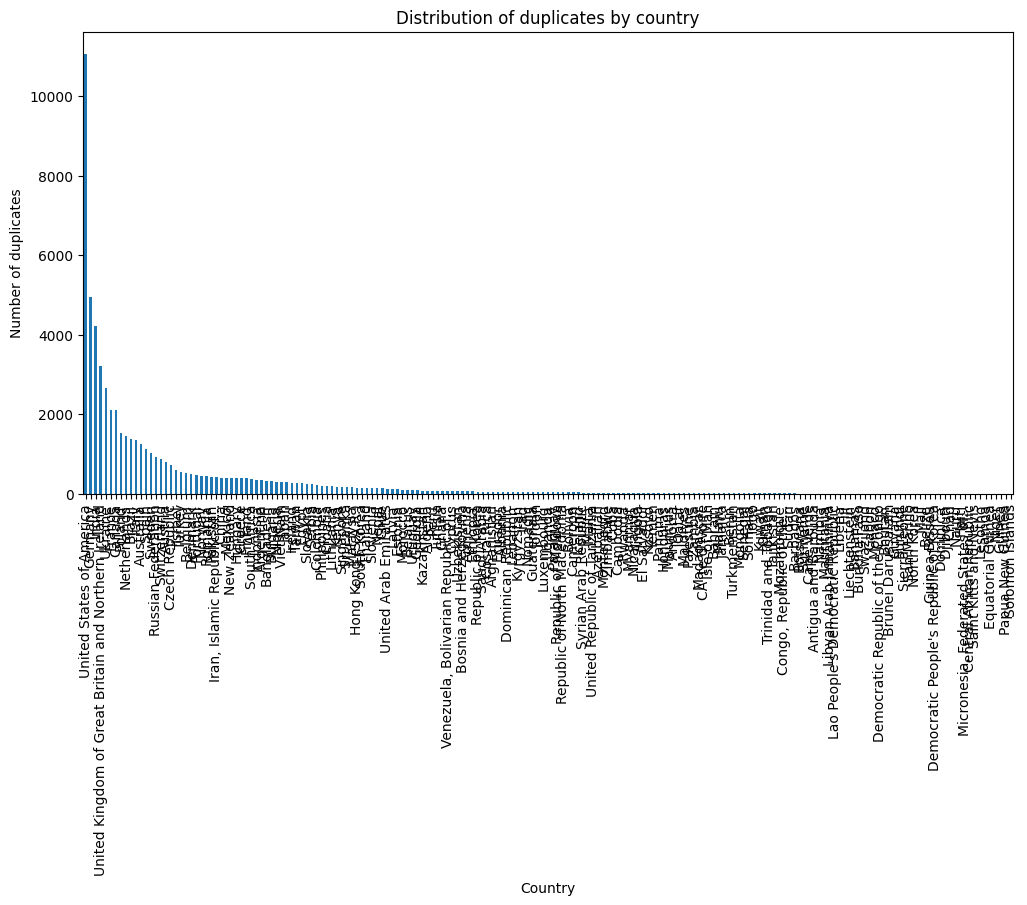

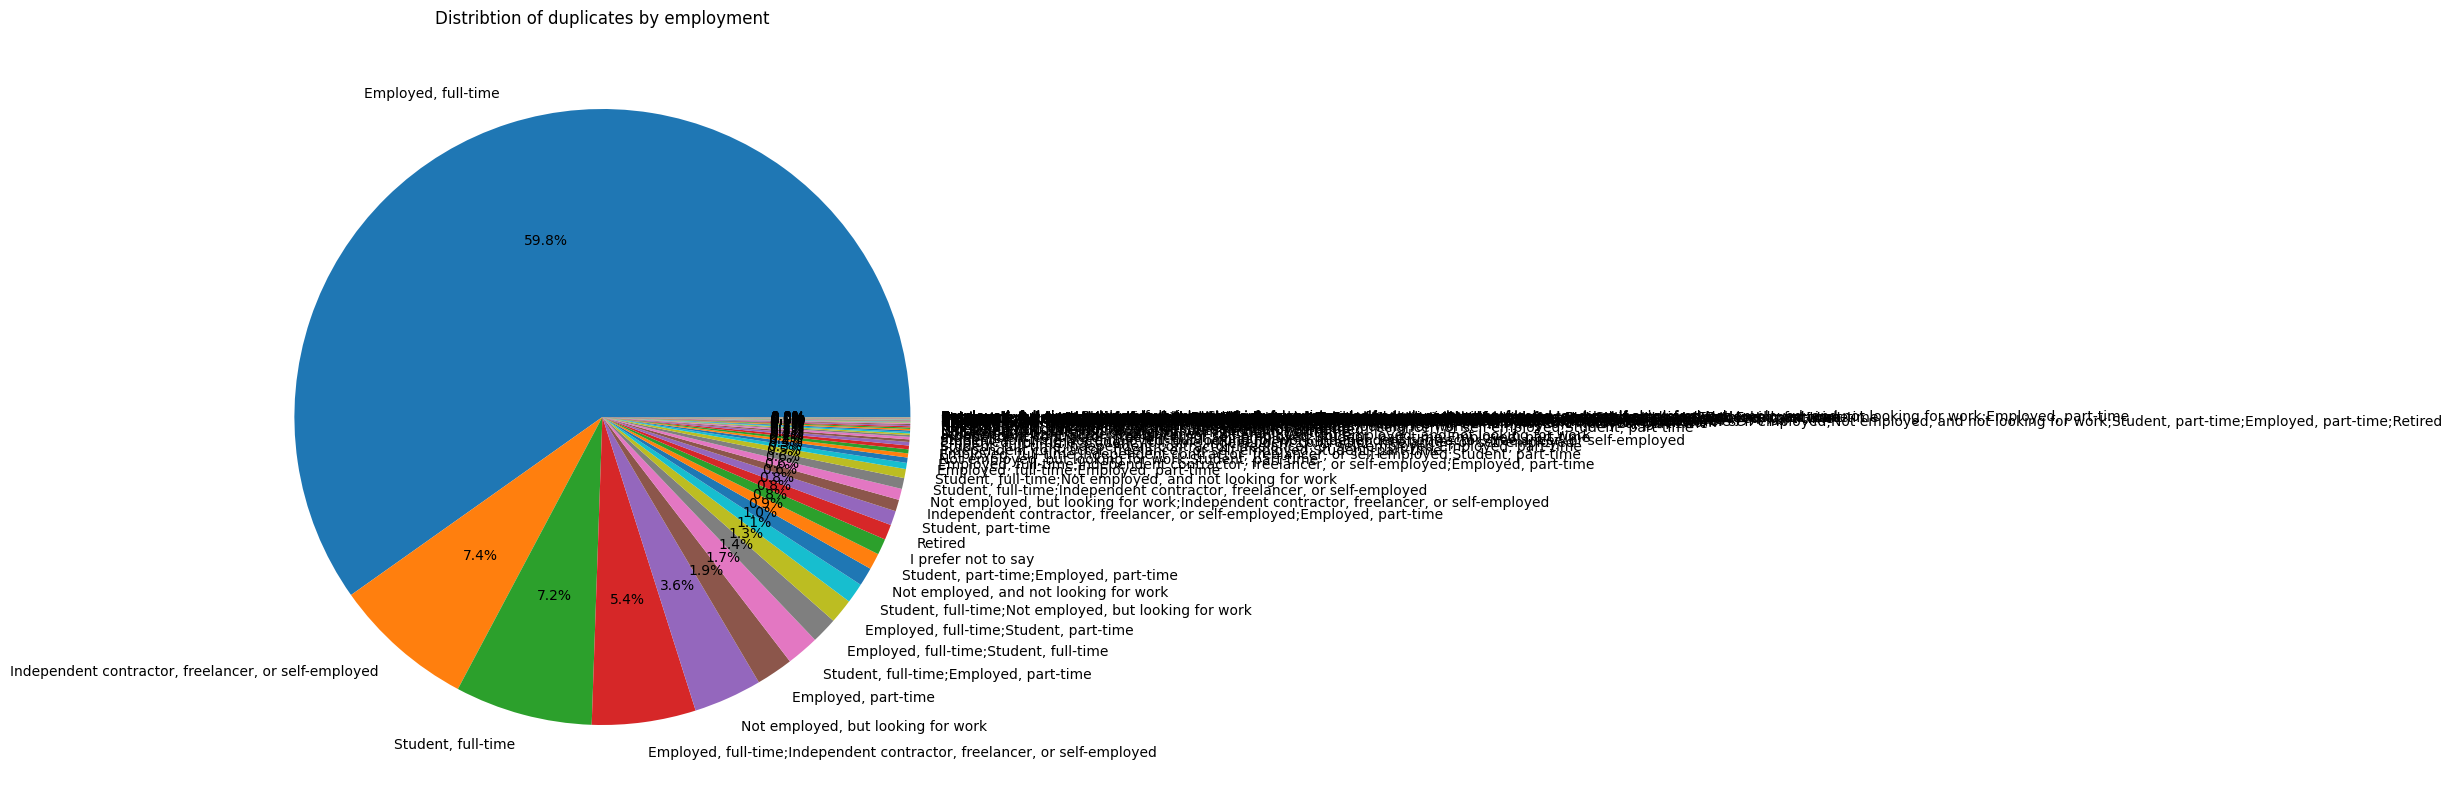

In [ ]:
# Visualization of duplicates distribution
# distribution of duplicates by country
country_counts = dupe_rows['Country'].value_counts()
country_counts.plot(kind = 'bar',figsize=(12,6))
plt.title('Distribution of duplicates by country')
plt.xlabel('Country')
plt.ylabel('Number of duplicates')
plt.show()

# distribution of duplicates by employment
employment_counts = dupe_rows['Employment'].value_counts()
employment_counts.plot(kind = 'pie',autopct='%1.1f%%',figsize=(10,10))
plt.title("Distribtion of duplicates by employment")
plt.ylabel("")
plt.show()


Removing Duplicates

In [ ]:
critical_columns = ['MainBranch', 'Employment', 'RemoteWork']

dedupe_df = df.drop_duplicates(subset = critical_columns,keep = 'first')
print("number of rows after deduplication:",{dedupe_df.shape})

number of rows after deduplication: {(561, 114)}


In [ ]:
df_nodup = df.drop_duplicates()
num_duplicates_after = df_nodup.duplicated().sum()
print("number of duplicate rows after removal:",num_duplicates_after)


number of duplicate rows after removal: 0


In [ ]:
# Removing duplicates
df_no_duplicates = df.drop_duplicates()

num_duplicates_after = df_no_duplicates.duplicated().sum()
print("Number of duplicate rows after removal:",num_duplicates_after)


Number of duplicate rows after removal: 0


In [ ]:
# Identify missing values
print(df_no_duplicates.isnull().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [ ]:
# Replacing missing values with most repeted values
# choose a column with significant missingness (e.g., EdLevel) and impute it using its most frequent value.
most_frequent_values = df_no_duplicates['EdLevel'].mode()[0]
df_no_duplicates['EdLevel'].fillna(most_frequent_values,inplace=True)

/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/3558796236.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_duplicates['EdLevel'].fillna(most_frequent_values,inplace=True)
/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/3558796236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['E

In [ ]:
# missing values in ConvertedCompYear col
miss_convertedcompyear = df_no_duplicates['ConvertedCompYearly'].isnull().sum()
print('number of missing values in convertedcompyear col:',miss_convertedcompyear)


number of missing values in convertedcompyear col: 42002


In [ ]:
mean_of_compyear = df_no_duplicates['ConvertedCompYearly'].mean()
df_no_duplicates['ConvertedCompYearly'].fillna(mean_of_compyear,inplace=True)
print('null values',df_no_duplicates['ConvertedCompYearly'].isnull().sum())

null values 0


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/2630482038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_duplicates['ConvertedCompYearly'].fillna(mean_of_compyear,inplace=True)
/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/2630482038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dupli

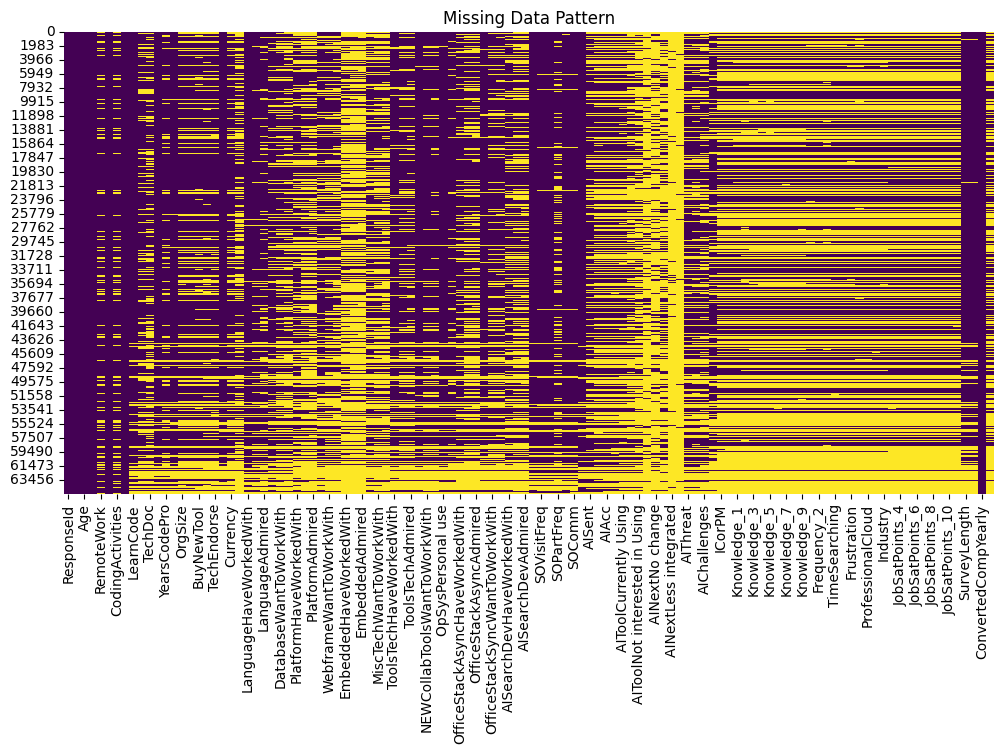

In [ ]:
# visualization of missing data pattern
plt.figure(figsize=(12,6))
sns.heatmap(df_no_duplicates.isnull(),cbar=False,cmap='viridis')
plt.title('Missing Data Pattern')
plt.show()


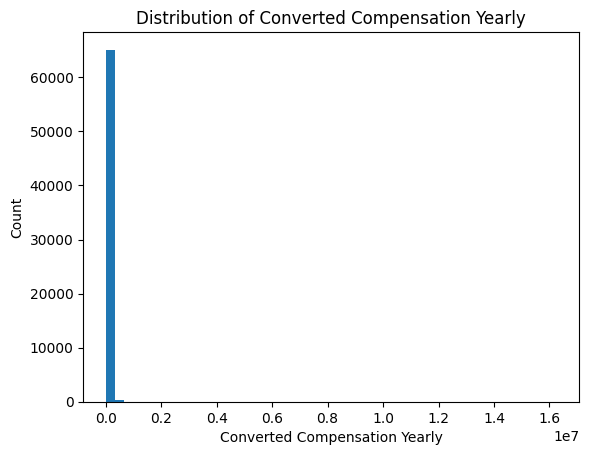

In [ ]:
# visulaize normalized compensation data
plt.hist(df_no_duplicates['ConvertedCompYearly'],bins=50)
plt.xlabel('Converted Compensation Yearly')
plt.ylabel('Count')
plt.title('Distribution of Converted Compensation Yearly')
plt.show()

In [ ]:
# Explore dataset 
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
          ResponseId                      MainBranch              Age  \
count   65457.000000                           65457            65457   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50219            23913   
mean    32714.493591                             NaN              NaN   
std     18892.431636                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16354.000000                             NaN              NaN   
50%     32716.000000                             NaN              NaN   
75%     49076.000000                             NaN              NaN   
max    

In [ ]:
#  finding missiing values 
missing_values = df.isnull().sum()
print("missing values in each column:\n",missing_values)

missing values in each column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10637
                       ...  
JobSatPoints_11        36006
SurveyLength            9259
SurveyEase              9202
ConvertedCompYearly    42020
JobSat                 36326
Length: 114, dtype: int64


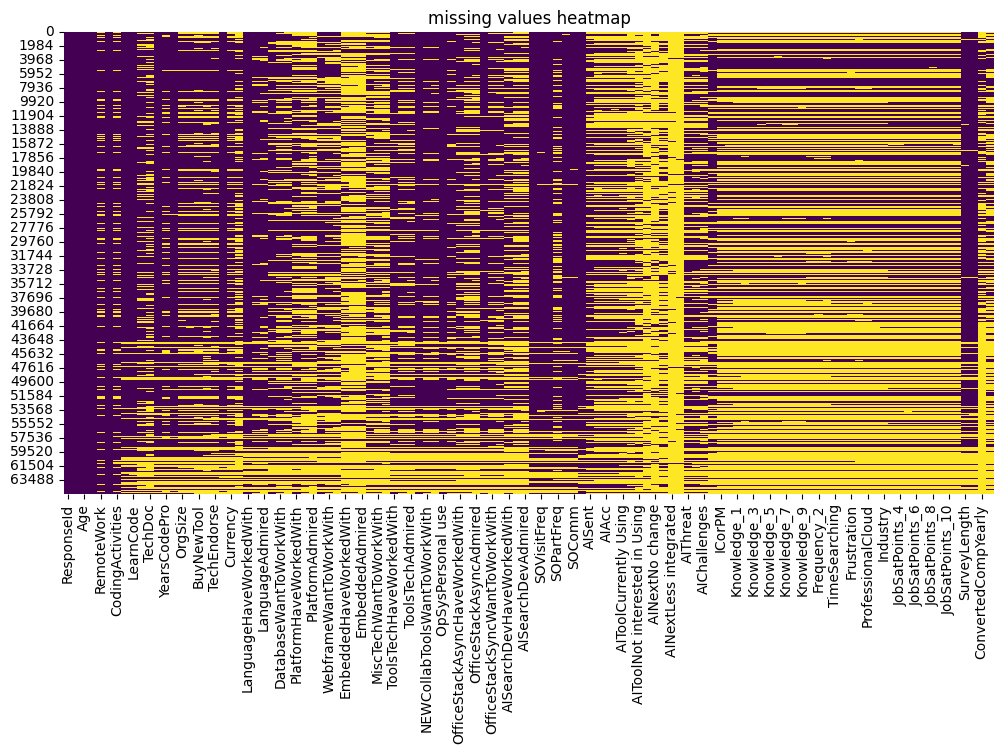

In [ ]:
# visualize missing values using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar = False,cmap='viridis')
plt.title('missing values heatmap')
plt.show()

In [ ]:
# count no.of missing values in each column
missing_employment = df['Employment'].isnull().sum()
print('number of missing values in employment col:',missing_employment)

number of missing values in employment col: 0


In [ ]:
# Imputing missing values
most_frequent_values = df['Employment'].mode()[0]
print(f"most frequent value in employment col:{most_frequent_values}")

most frequent value in employment col:Employed, full-time


In [ ]:
# Imputing missing values with most frequent value
df['Employment'].fillna(most_frequent_values,inplace=True)
print('Imputed missing values in Employment column with most frequent value.')

Imputed missing values in Employment column with most frequent value.


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/2970346196.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent_values,inplace=True)


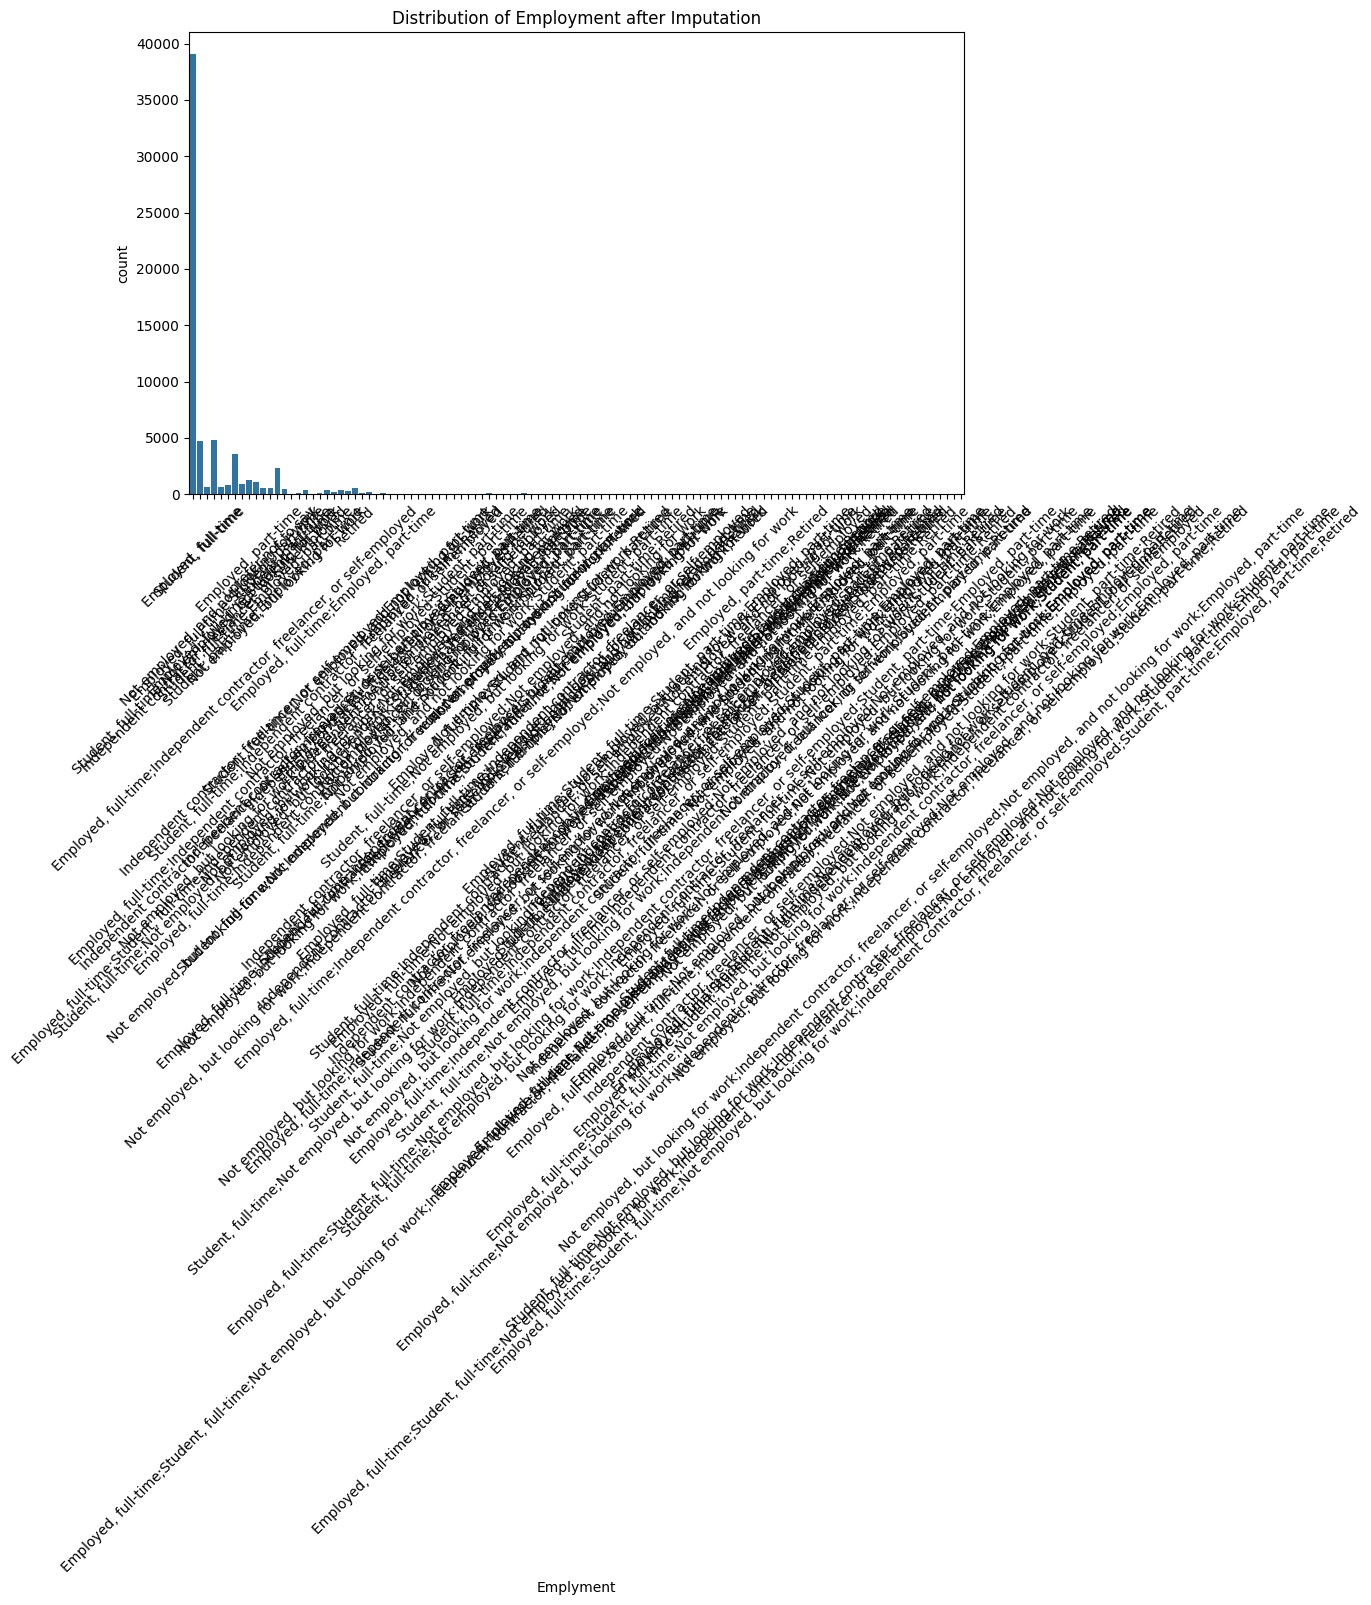

In [ ]:
# visualizing the distribution of employment after imputation
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Employment')
plt.title('Distribution of Employment after Imputation')
plt.xlabel('Emplyment')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Finding & Removing Duplicates
# number of duplicate rows
print("number of duplicate rows:",df.duplicated().sum())

number of duplicate rows: 20


In [ ]:
# remove duplicate rows
df = df.drop_duplicates()
print('number of duplicate rows after removal:',df.duplicated().sum())

number of duplicate rows after removal: 0


In [ ]:
# find missing values
print('missing values per col:',df.isnull().sum())

missing values per col: ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [ ]:
# imputing missing vslues
# value count for remotework col
print("value count for remotework col:\n",df['RemoteWork'].value_counts())

value count for remotework col:
 RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


In [ ]:
# identifing most frequent value
print('most frequent value in remotework col:',df['RemoteWork'].mode()[0])

most frequent value in remotework col: Hybrid (some remote, some in-person)


In [ ]:
# imputing missing values in RemoteWork col with most frequent value
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0],inplace=True)
print('number of missing values in remotework col after imputation:',df['RemoteWork'].isnull().sum())

number of missing values in remotework col after imputation: 0


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/1290845661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(df['RemoteWork'].mode()[0],inplace=True)


In [ ]:
# Find columns related to compensation
comp_cols = [col for col in df.columns if 'Comp' in col or 'Salary' in col]

# Describe their distributions
for col in comp_cols:
    print(f"\nDistribution for {col}:")
    print(df[col].describe())
    missing_comp = df[col].isnull().sum()
    print(f"Missing values in '{col}': {missing_comp}")



Distribution for CompTotal:
count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64
Missing values in 'CompTotal': 31697

Distribution for AIComplex:
count                                             37021
unique                                                5
top       Good, but not great at handling complex tasks
freq                                              12102
Name: AIComplex, dtype: object
Missing values in 'AIComplex': 28416

Distribution for ConvertedCompYearly:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64
Missing values in 'ConvertedCompYearly': 42002


In [ ]:
# handling duplicates
print("Number of duplicates:",df.duplicated().sum())
df = df.drop_duplicates()
print("number of duplicates after removal:",df.duplicated().sum())

Number of duplicates: 0
number of duplicates after removal: 0


In [ ]:
# Handling missing values in CodingActivities
print("Missing values in CodingActivities col:",df['CodingActivities'].isnull().sum())


Missing values in CodingActivities col: 10971


In [ ]:
# Imputing missing values in CodingActivities with forward fill method
df['CodingActivities'].fillna(method = 'ffill',inplace=True)
print("Missing values in CodingActivites col after Imputing:",df['CodingActivities'].isnull().sum())

Missing values in CodingActivites col after Imputing: 0


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/3762585446.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method = 'ffill',inplace=True)
/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/3762585446.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method = 'ffill',inplace=True)


In [ ]:
# Normalizing Compensation Data
# identify compensation-related columns is ConvertedCompYearly
print(df['ConvertedCompYearly'].describe())

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [ ]:
# Handling Missing Values in ConvertedCompYearly
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(),inplace=True)
print("Missing values in ConvertedCompYearly after imputation:",df['ConvertedCompYearly'].isnull().sum())

Missing values in ConvertedCompYearly after imputation: 0


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/959791193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(),inplace=True)


In [ ]:
# Min-Max Scaling
min_comp = df['ConvertedCompYearly'].min()
max_comp = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_minmax']=df['ConvertedCompYearly']-(min_comp/(max_comp-min_comp))
print(df[['ConvertedCompYearly','ConvertedCompYearly_minmax']].head())

   ConvertedCompYearly  ConvertedCompYearly_minmax
0              65000.0                     65000.0
1              65000.0                     65000.0
2              65000.0                     65000.0
3              65000.0                     65000.0
4              65000.0                     65000.0


In [ ]:
# Z - score normalization
mean_comp = df['ConvertedCompYearly'].mean()
std_comp = df['ConvertedCompYearly'].std()
df['ConvertedCompYearly_zscore'] = (df['ConvertedCompYearly'] - mean_comp) / std_comp
print(df[['ConvertedCompYearly','ConvertedCompYearly_zscore']].head())

   ConvertedCompYearly  ConvertedCompYearly_zscore
0              65000.0                   -0.067513
1              65000.0                   -0.067513
2              65000.0                   -0.067513
3              65000.0                   -0.067513
4              65000.0                   -0.067513


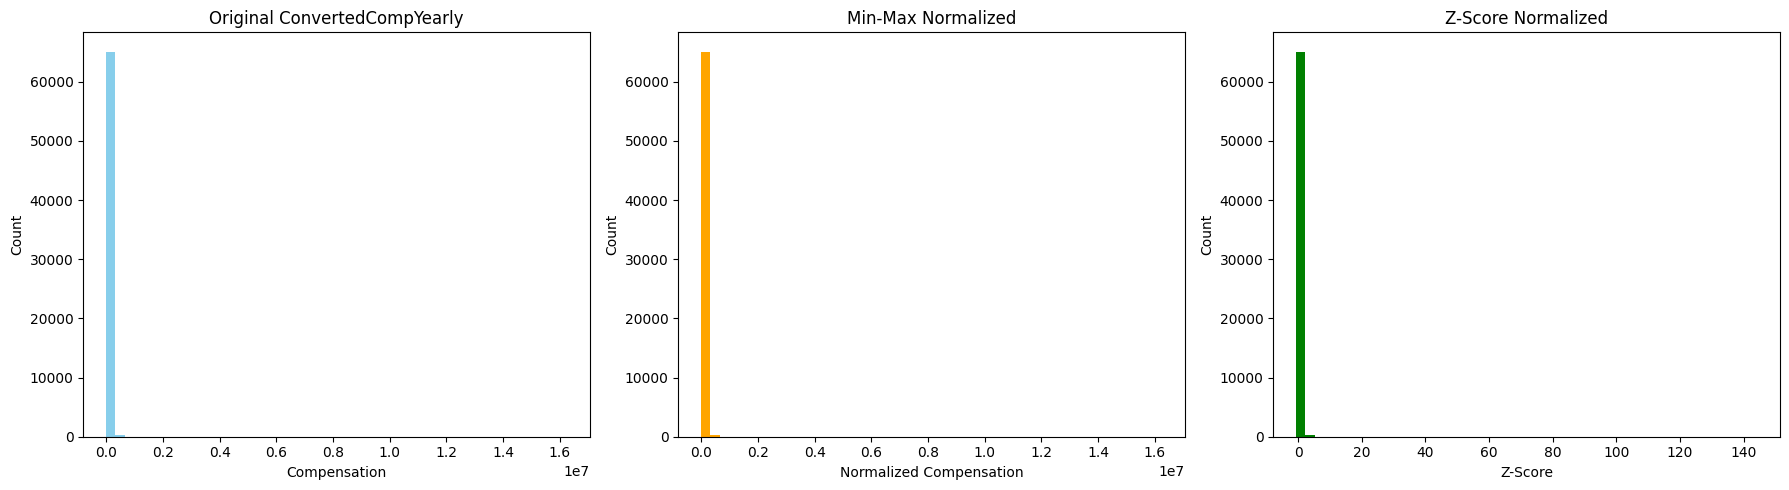

In [ ]:
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=50, color='skyblue')
plt.title('Original ConvertedCompYearly')
plt.xlabel('Compensation')
plt.ylabel('Count')

# Min-Max Normalized
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_minmax'], bins=50, color='orange')
plt.title('Min-Max Normalized')
plt.xlabel('Normalized Compensation')
plt.ylabel('Count')

# Z-Score Normalized
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_zscore'], bins=50, color='green')
plt.title('Z-Score Normalized')
plt.xlabel('Z-Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# Explore dataset
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 0 to 65436
Columns: 116 entries, ResponseId to ConvertedCompYearly_zscore
dtypes: float64(15), int64(1), object(100)
memory usage: 58.4+ MB
None
ResponseId                        0
MainBranch                        0
Age                               0
Employment                        0
RemoteWork                        0
                              ...  
SurveyEase                     9199
ConvertedCompYearly               0
JobSat                        36311
ConvertedCompYearly_minmax        0
ConvertedCompYearly_zscore        0
Length: 116, dtype: int64
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+0

In [ ]:
# Identifying & Removing Inconsistent Entries
# Identify inconsistent entries in Country column
print(df['Country'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [ ]:
# Mapping inconsistent entries to standard names
country_map ={
    'United States of America (USA)': 'United States',
    'U.S.A.': 'United States',
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'Deutschland': 'Germany',
    'Brasil': 'Brazil',
    'Espana': 'Spain',
    'N/A': None,
    'NA': None,
    'nan': None
}
df['Country']=df['Country'].replace(country_map)

#  Similarly for Edlevel col
education_map = {
    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree',
    'Some college/university study without earning a degree': 'Some college/university study',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
    'Professional degree (JD, MD, etc.)': 'Professional degree',
    'I never completed any formal education': 'No formal education'
}
df['EdLevel']=df['EdLevel'].replace(education_map)

In [ ]:
# Encoding Categorical Variables
# One-hot encoding for Employment col
employment_encoded = pd.get_dummies(df['Employment'],prefix = 'Employment')
df = pd.concat([df,employment_encoded],axis=1)

In [ ]:
# handling missing values
missing_counts = df.isnull().sum().sort_values(ascending=False)
print(missing_counts.head())


AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
dtype: int64


In [ ]:
# Use median for compensation
comp_median = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(comp_median, inplace=True)


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/4131887404.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(comp_median, inplace=True)


In [ ]:
remote_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(remote_mode, inplace=True)


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/3723063621.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(remote_mode, inplace=True)


In [ ]:
min_comp = df['ConvertedCompYearly'].min()
max_comp = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_comp) / (max_comp - min_comp)


In [ ]:
import numpy as np
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])


In [ ]:
def experience_level(years):
    if pd.isnull(years):
        return 'Unknown'
    try:
        years = float(years)
    except:
        return 'Unknown'
    if years < 2:
        return 'Beginner'
    elif years < 5:
        return 'Intermediate'
    else:
        return 'Advanced'

df['ExperienceLevel'] = df['YearsCodePro'].apply(experience_level)
print(df[['YearsCodePro', 'ExperienceLevel']].head())


  YearsCodePro ExperienceLevel
0          NaN         Unknown
1           17        Advanced
2           27        Advanced
3          NaN         Unknown
4          NaN         Unknown


In [ ]:
# EDA
# Handling Missing Values
print(df[['Employment','JobSat','RemoteWork']].isnull().sum())
# Imputing missing values
for col in ['Employment','JobSat','RemoteWork']:
    mode = df[col].mode()[0]
    df[col].fillna(mode,inplace=True)
print("Missing values after imputation:\n",df[['Employment','JobSat','RemoteWork']].isnull().sum())

Employment        0
JobSat        36311
RemoteWork        0
dtype: int64
Missing values after imputation:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/3045478449.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode,inplace=True)


Median JobSat by Experience Level:
 ExperienceLevel
0-5 years      8.0
5-10 years     8.0
10-20 years    8.0
20+ years      8.0
Name: JobSat, dtype: float64


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/2316544564.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_JobSat = df.groupby('ExperienceLevel')['JobSat'].agg(lambda x: x.value_counts().idxmax())


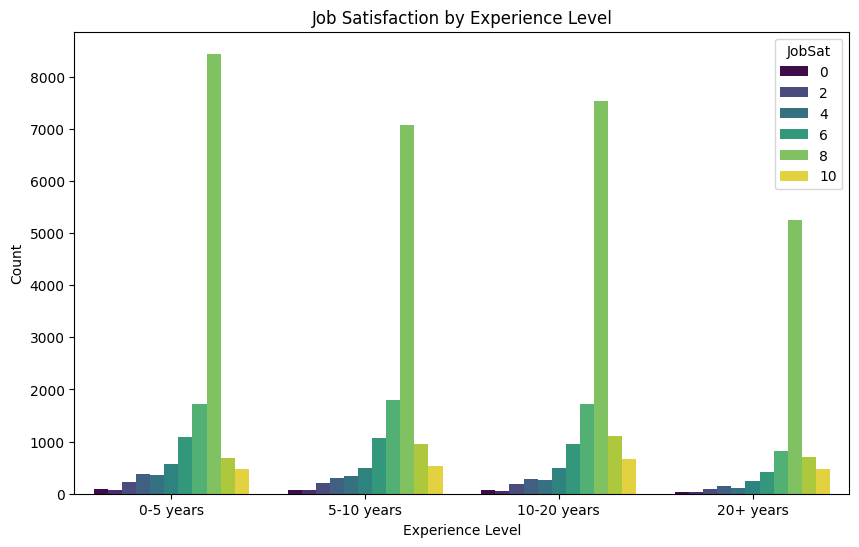

In [ ]:
# Analysis of Experience & Job Satisfaction
#  Bins & Labels
bin = [0,5,10, 20, 100]
labels = ['0-5 years','5-10 years','10-20 years','20+ years']
#  Convert YearsCodePro to numeric
df['YearsCodePro']=pd.to_numeric(df['YearsCodePro'],errors='coerce')
# Binning YearsCodePro
df['ExperienceLevel']=pd.cut(df['YearsCodePro'],bins=bin,labels=labels,right=False)
# calculate median jobsat for each range
median_JobSat = df.groupby('ExperienceLevel')['JobSat'].agg(lambda x: x.value_counts().idxmax())
print("Median JobSat by Experience Level:\n",median_JobSat)
# visualize the relationship
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ExperienceLevel',hue='JobSat',palette='viridis')
plt.title('Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

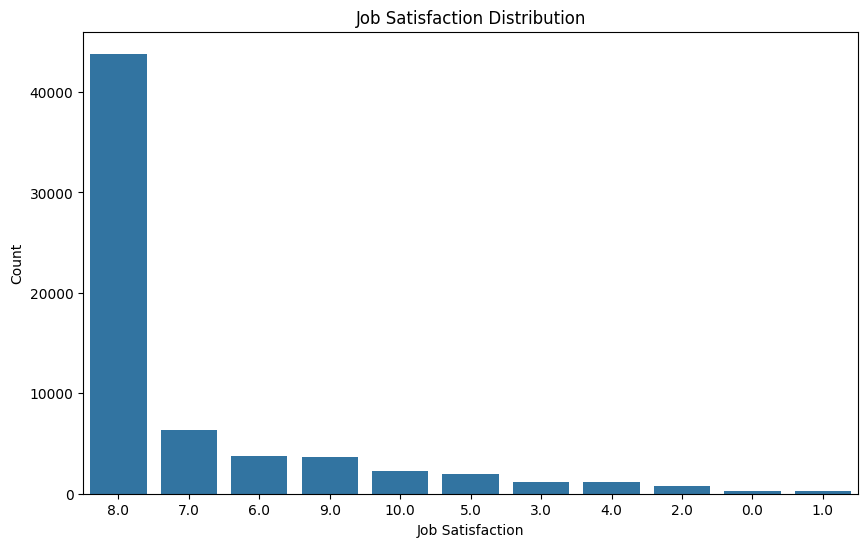

In [ ]:
# Visualize Job satisfaction
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='JobSat',order=df['JobSat'].value_counts().index)
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

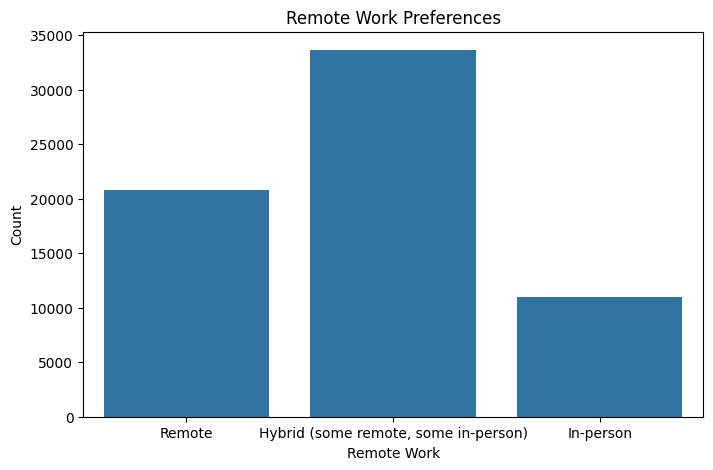

In [ ]:
# Analyzing Remote Work Preferences
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='RemoteWork')
plt.title('Remote Work Preferences')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

Cross-tabulation of RemoteWork and Employment:
 Employment                            Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                17296   
In-person                                            8552   
Remote                                              13193   

Employment                            Employed, full-time;Employed, part-time  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)                                       85   
In-person                                                                  32   
Remote                                                                     95   

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed  \
RemoteWork                                                                                                       
Hybrid (some

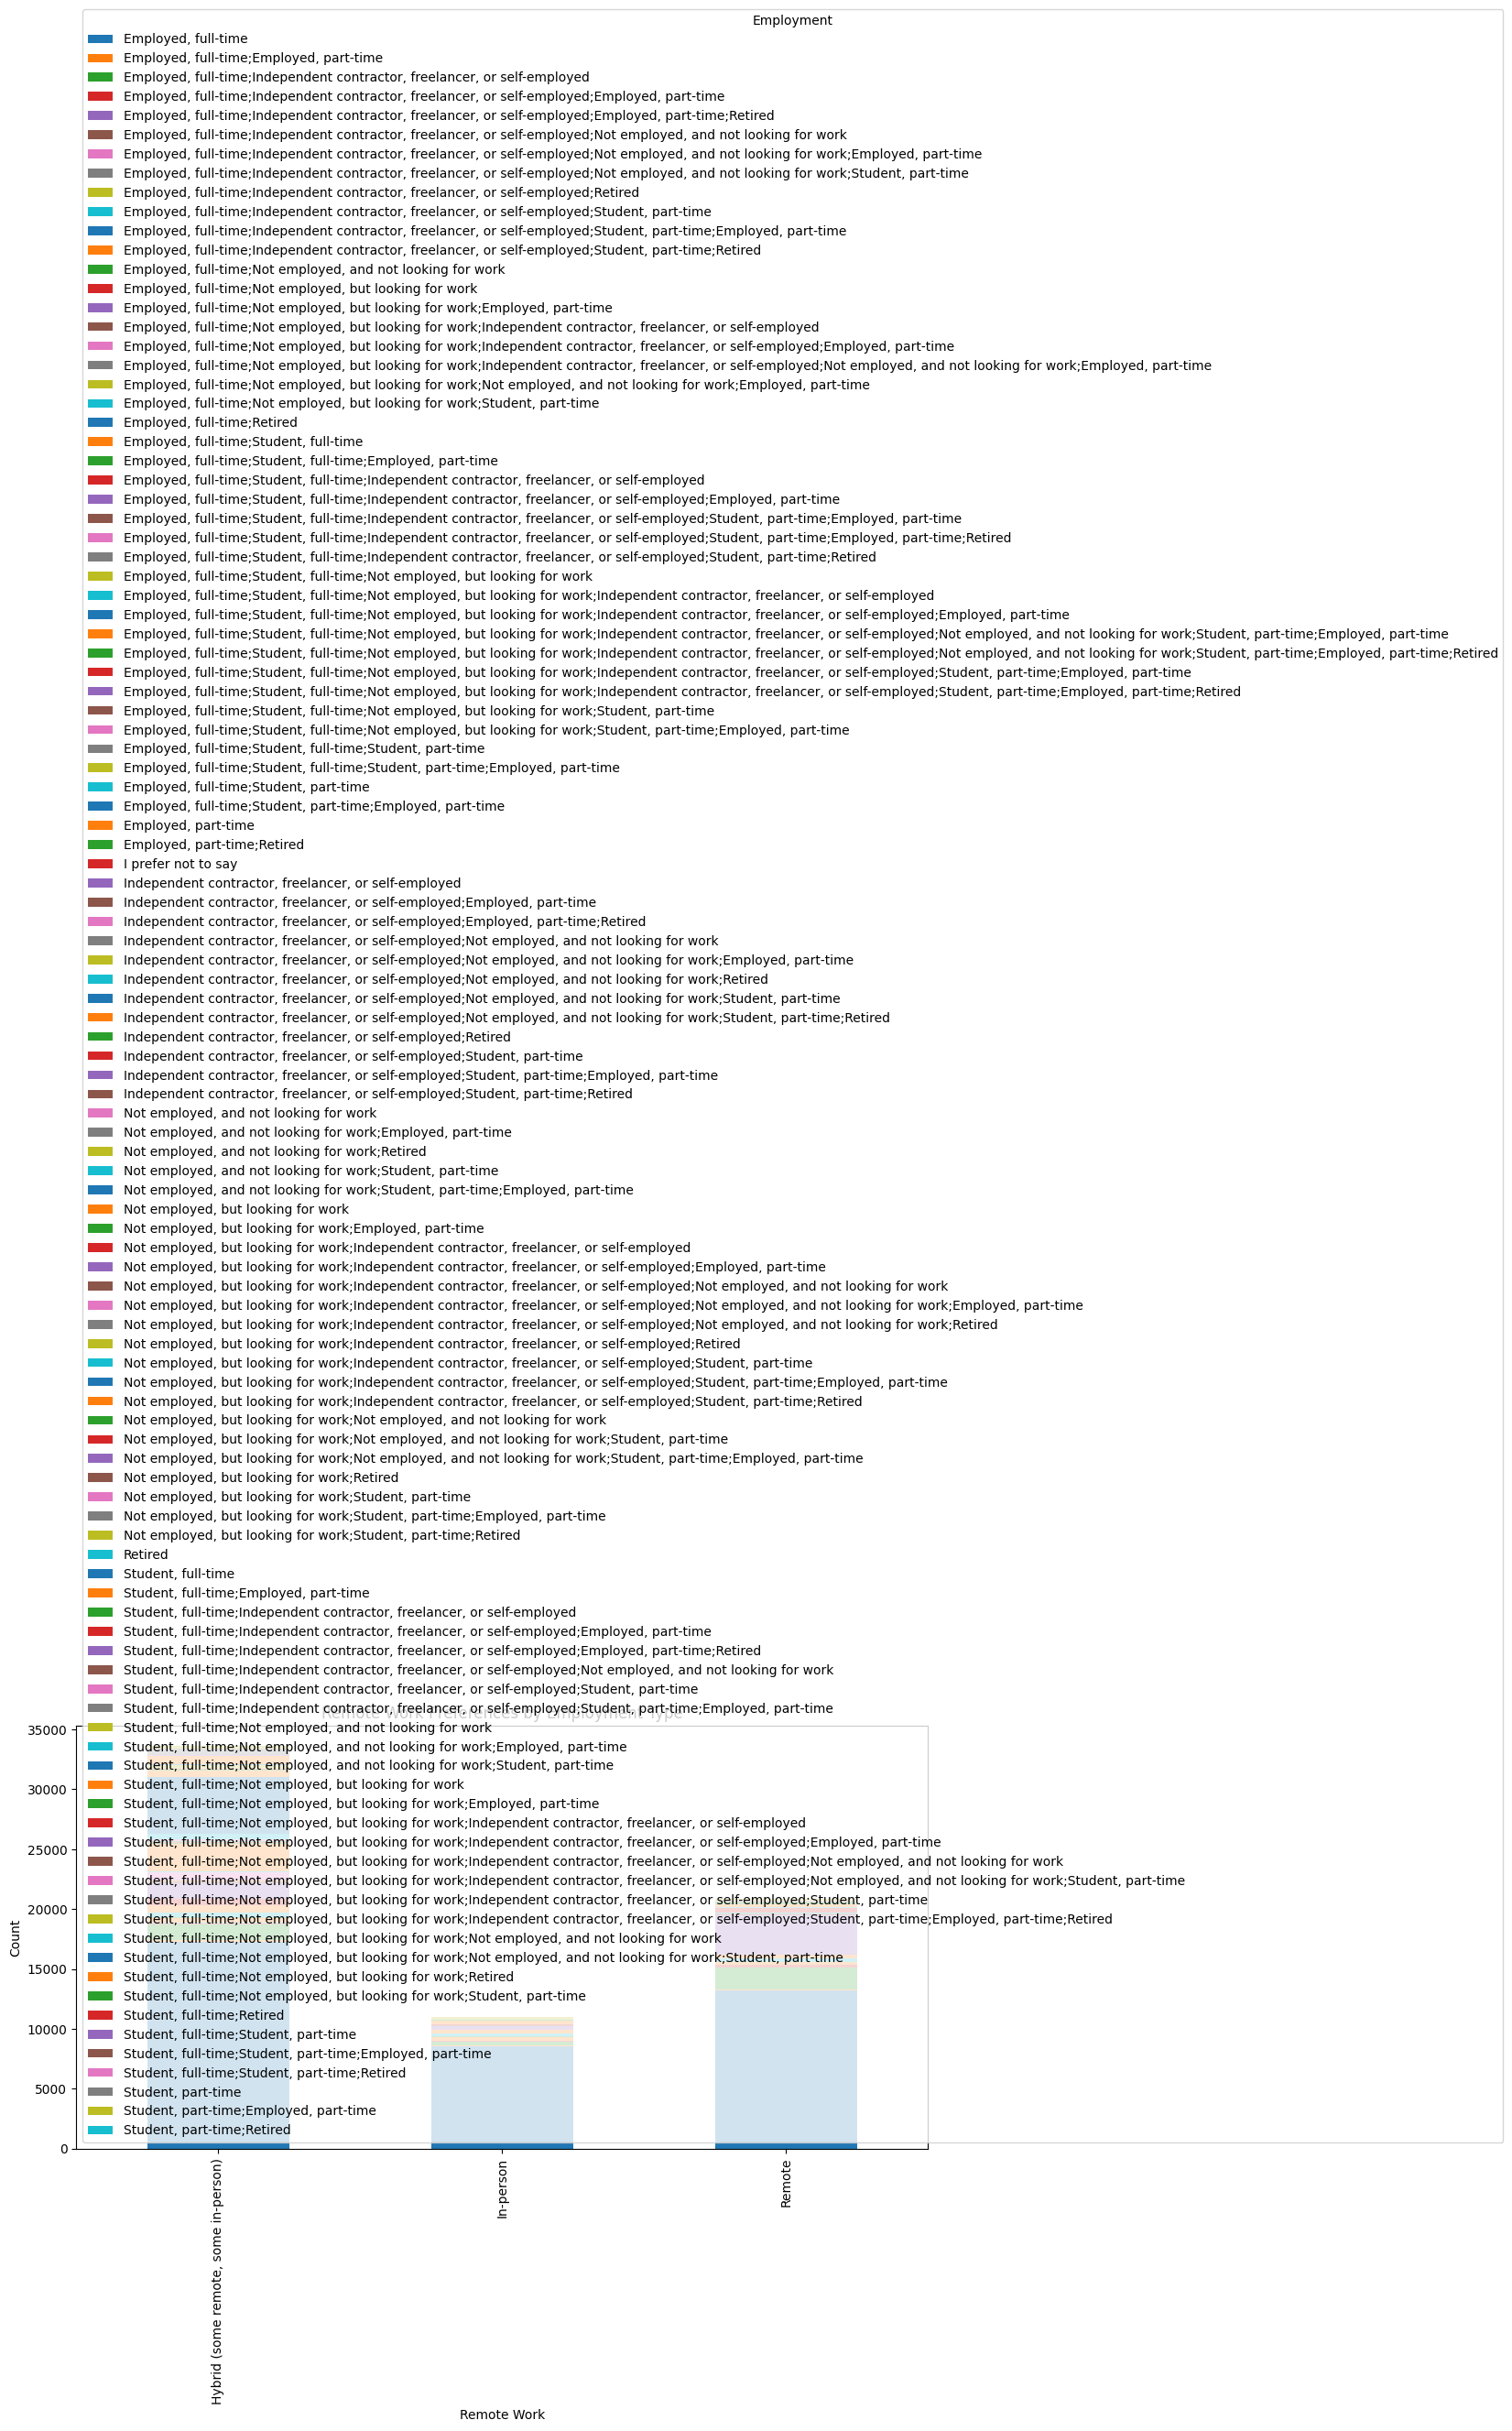

In [ ]:
# Cross-tabulation of RemoteWork and Employment
remote_employment_ct = pd.crosstab(df['RemoteWork'],df['Employment'])
print("Cross-tabulation of RemoteWork and Employment:\n",remote_employment_ct)

remote_employment_ct.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

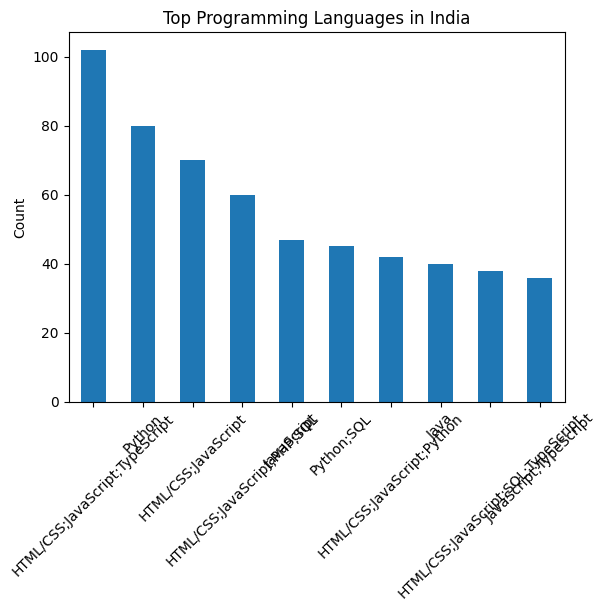

In [ ]:
# Extract region info
region_lang = df.groupby('Country')['LanguageHaveWorkedWith'].apply(lambda x: ','.join(x.dropna()))

# Count top languages per region (example: for India)
india_langs = region_lang['India'].split(',')
pd.Series(india_langs).value_counts().head(10).plot(kind='bar')
plt.title('Top Programming Languages in India')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


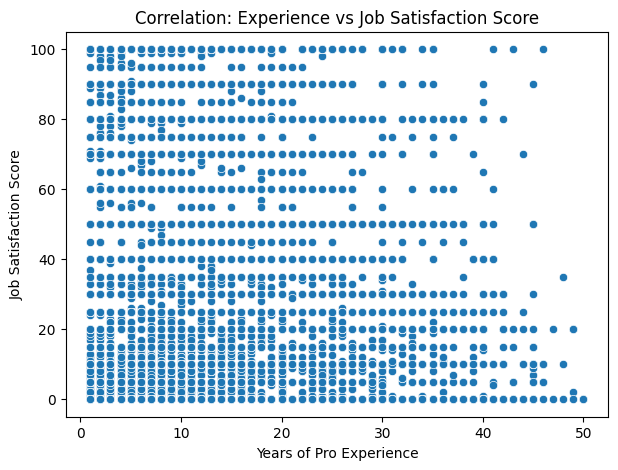

In [ ]:
# Convert JobSatPoints_1 to numeric if present
if 'JobSatPoints_1' in df.columns:
    df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df)
    plt.title('Correlation: Experience vs Job Satisfaction Score')
    plt.xlabel('Years of Pro Experience')
    plt.ylabel('Job Satisfaction Score')
    plt.show()


Employment                                         Employed, full-time  \
EdLevel                                                                  
Associate degree (A.A., A.S., etc.)                               1059   
Bachelorâs degree (B.A., B.S., B.Eng., etc.)                   16806   
Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)                11011   
Primary/elementary school                                          160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                    2073   
Secondary school                                                  1460   
Some college/university study                                     3579   
Something else                                                     377   

Employment                                         Employed, full-time;Employed, part-time  \
EdLevel                                                                                      
Associate degree (A.A., A.S., etc.)                                    

/Users/saidattaputta/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/saidattaputta/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


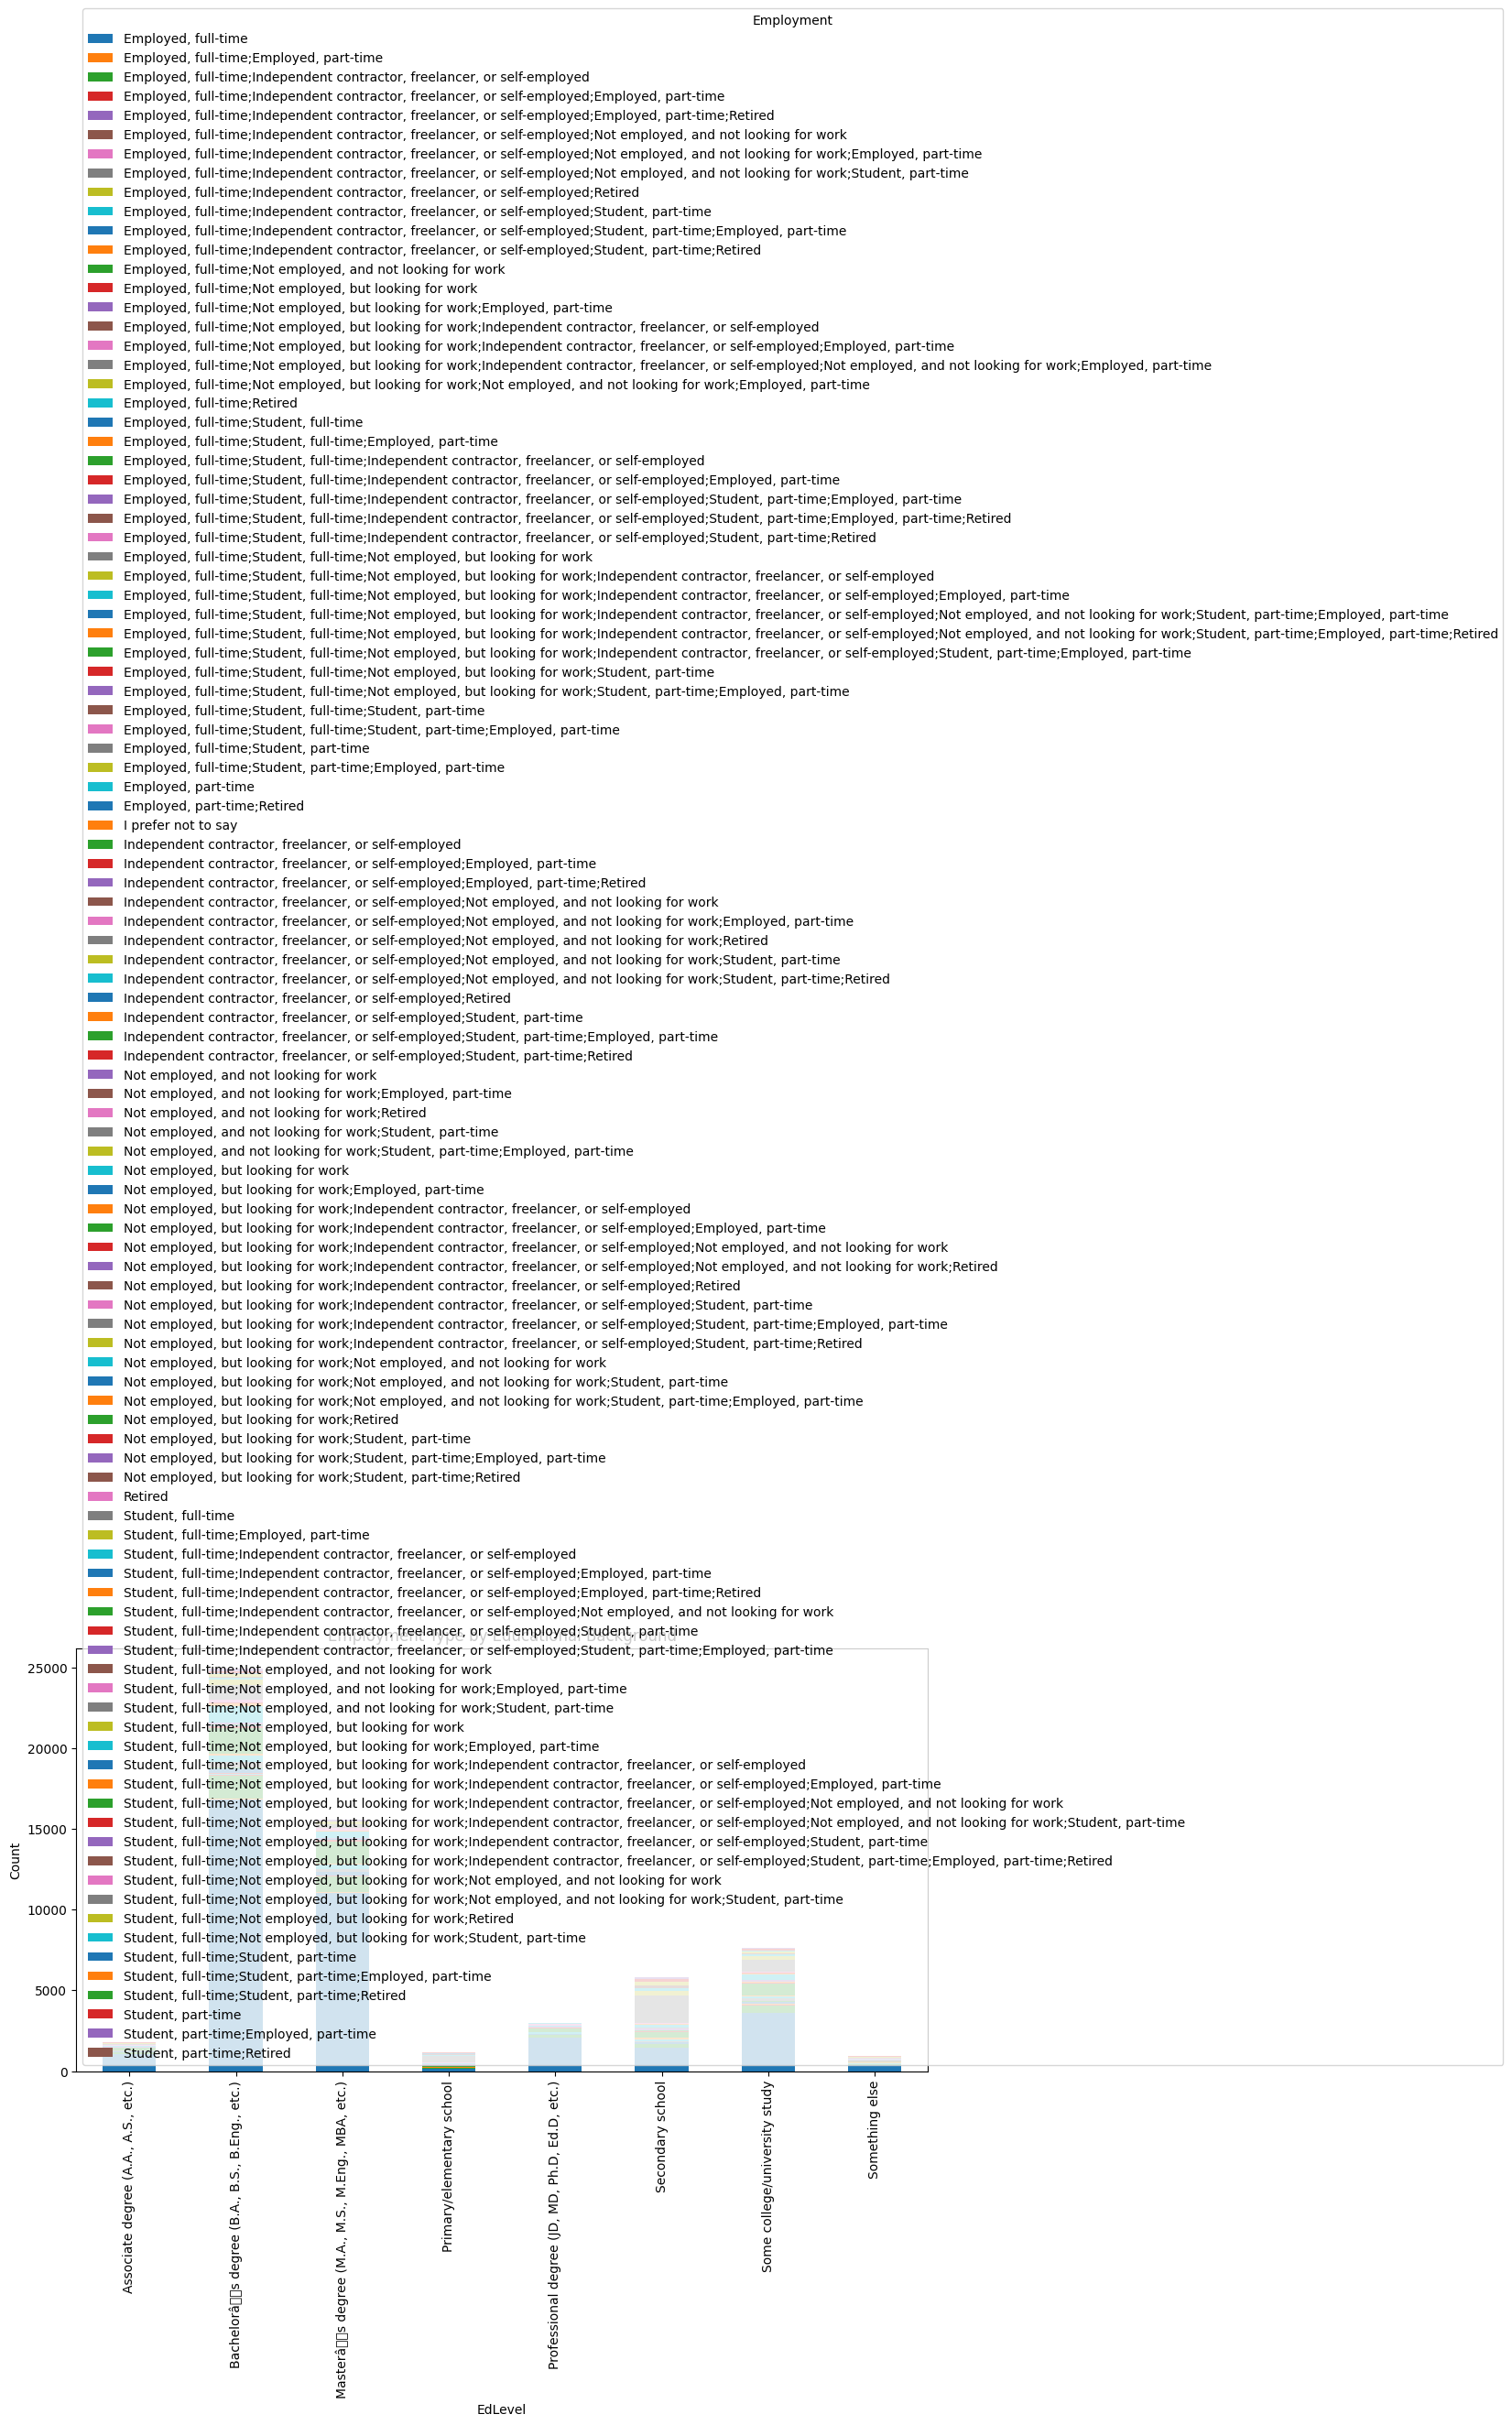

In [ ]:
ed_emp_ct = pd.crosstab(df['EdLevel'], df['Employment'])
print(ed_emp_ct)

ed_emp_ct.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Employment Type by Educational Background')
plt.ylabel('Count')
plt.show()


In [ ]:
df.to_csv('cleaned_analyzed_survey.csv', index=False)


In [ ]:
# handling missing values
print("Number of missing values before imputation:\n",df.isnull().sum())
# filling the missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

Number of missing values before imputation:
 ResponseId                                               0
MainBranch                                               0
Age                                                      0
Employment                                               0
RemoteWork                                               0
                                                     ...  
Employment_Student, part-time;Employed, part-time        0
Employment_Student, part-time;Retired                    0
ConvertedCompYearly_MinMax                               0
ConvertedCompYearly_Log                                  0
ExperienceLevel                                      16733
Length: 229, dtype: int64


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/1452875751.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/1452875751.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [ ]:
# Analyze key col
print("employment value counts:\n",df["Employment"].value_counts())
print("jobsat value counts:\n",df["JobSat"].value_counts())
print("remotework value counts:\n",df["RemoteWork"].value_counts())

employment value counts:
 Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full

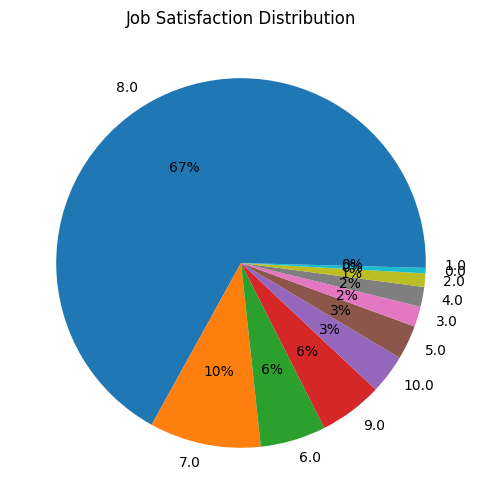

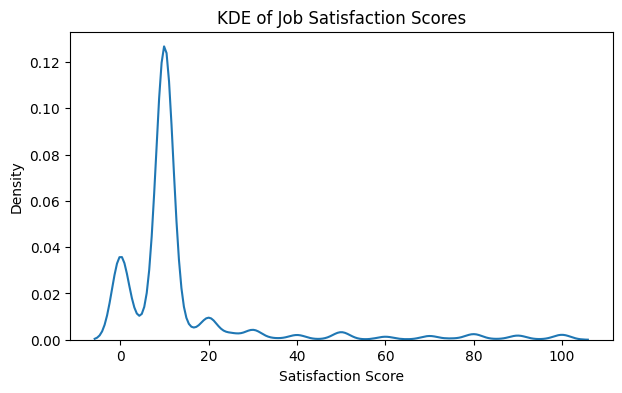

In [ ]:
# Visualize JOb satisfaction
# Pie chart
plt.figure(figsize=(6,6))
df['JobSat'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Job Satisfaction Distribution')
plt.ylabel('')
plt.show()

# (Alternate: KDE plot for numerical satisfaction score if available)
# If 'JobSatPoints_1' is numeric:
if 'JobSatPoints_1' in df.columns and pd.api.types.is_numeric_dtype(df['JobSatPoints_1']):
    plt.figure(figsize=(7,4))
    sns.kdeplot(df['JobSatPoints_1'].dropna())
    plt.title('KDE of Job Satisfaction Scores')
    plt.xlabel('Satisfaction Score')
    plt.show()

Note: you may need to restart the kernel to use updated packages.


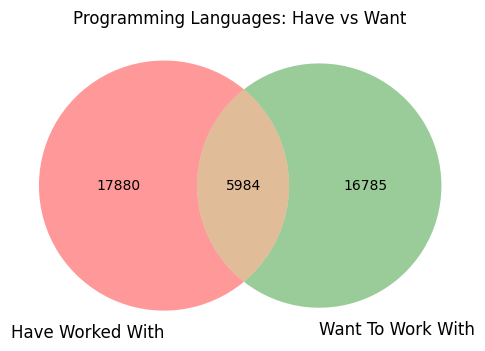

In [ ]:
%pip install matplotlib-venn
from matplotlib_venn import venn2

# Languages respondents HAVE worked with
langs_have = set(','.join(df['LanguageHaveWorkedWith'].dropna()).split(','))
# Languages respondents WANT to work with
langs_want = set(','.join(df['LanguageWantToWorkWith'].dropna()).split(','))

plt.figure(figsize=(6,4))
venn2([langs_have, langs_want], set_labels=('Have Worked With', 'Want To Work With'))
plt.title('Programming Languages: Have vs Want')
plt.show()


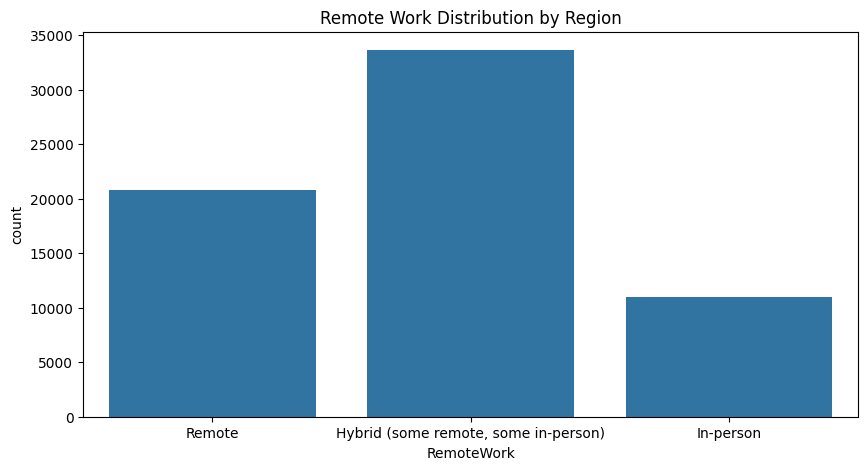

In [ ]:
# Analyze Remote Work Trends
plt.figure(figsize=(10,5))
sns.countplot(x='RemoteWork', data=df)
plt.title('Remote Work Distribution by Region')
# plt.xticks(rotation=45)
plt.show()

Pearson correlation between Job Satisfaction and Experience: -0.01


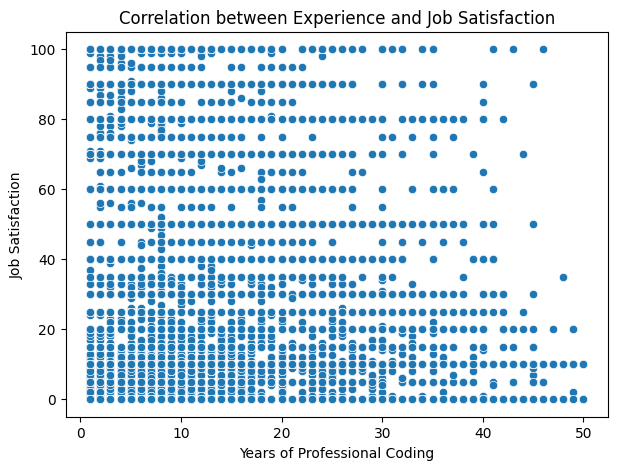

In [ ]:
# Convert JobSat to a numeric score if necessary, e.g., mapping categories
if 'JobSatPoints_1' in df.columns and pd.api.types.is_numeric_dtype(df['JobSatPoints_1']):
    sat_col = 'JobSatPoints_1'
else:
    # Example mapping, customize as needed
    job_sat_map = {
        'Very satisfied': 5, 'Slightly satisfied': 4, 'Neither satisfied nor dissatisfied': 3,
        'Slightly dissatisfied': 2, 'Very dissatisfied': 1
    }
    df['JobSat_num'] = df['JobSat'].map(job_sat_map)
    sat_col = 'JobSat_num'

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
corr = df[[sat_col, 'YearsCodePro']].corr(method='pearson').iloc[0,1]
print(f"Pearson correlation between Job Satisfaction and Experience: {corr:.2f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x='YearsCodePro', y=sat_col, data=df)
plt.title('Correlation between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction')
plt.show()


Employment                                         Employed, full-time  \
EdLevel                                                                  
Associate degree (A.A., A.S., etc.)                               1059   
Bachelorâs degree (B.A., B.S., B.Eng., etc.)                   19322   
Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)                11011   
Primary/elementary school                                          160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                    2073   
Secondary school                                                  1460   
Some college/university study                                     3579   
Something else                                                     377   

Employment                                         Employed, full-time;Employed, part-time  \
EdLevel                                                                                      
Associate degree (A.A., A.S., etc.)                                    

/Users/saidattaputta/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/saidattaputta/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


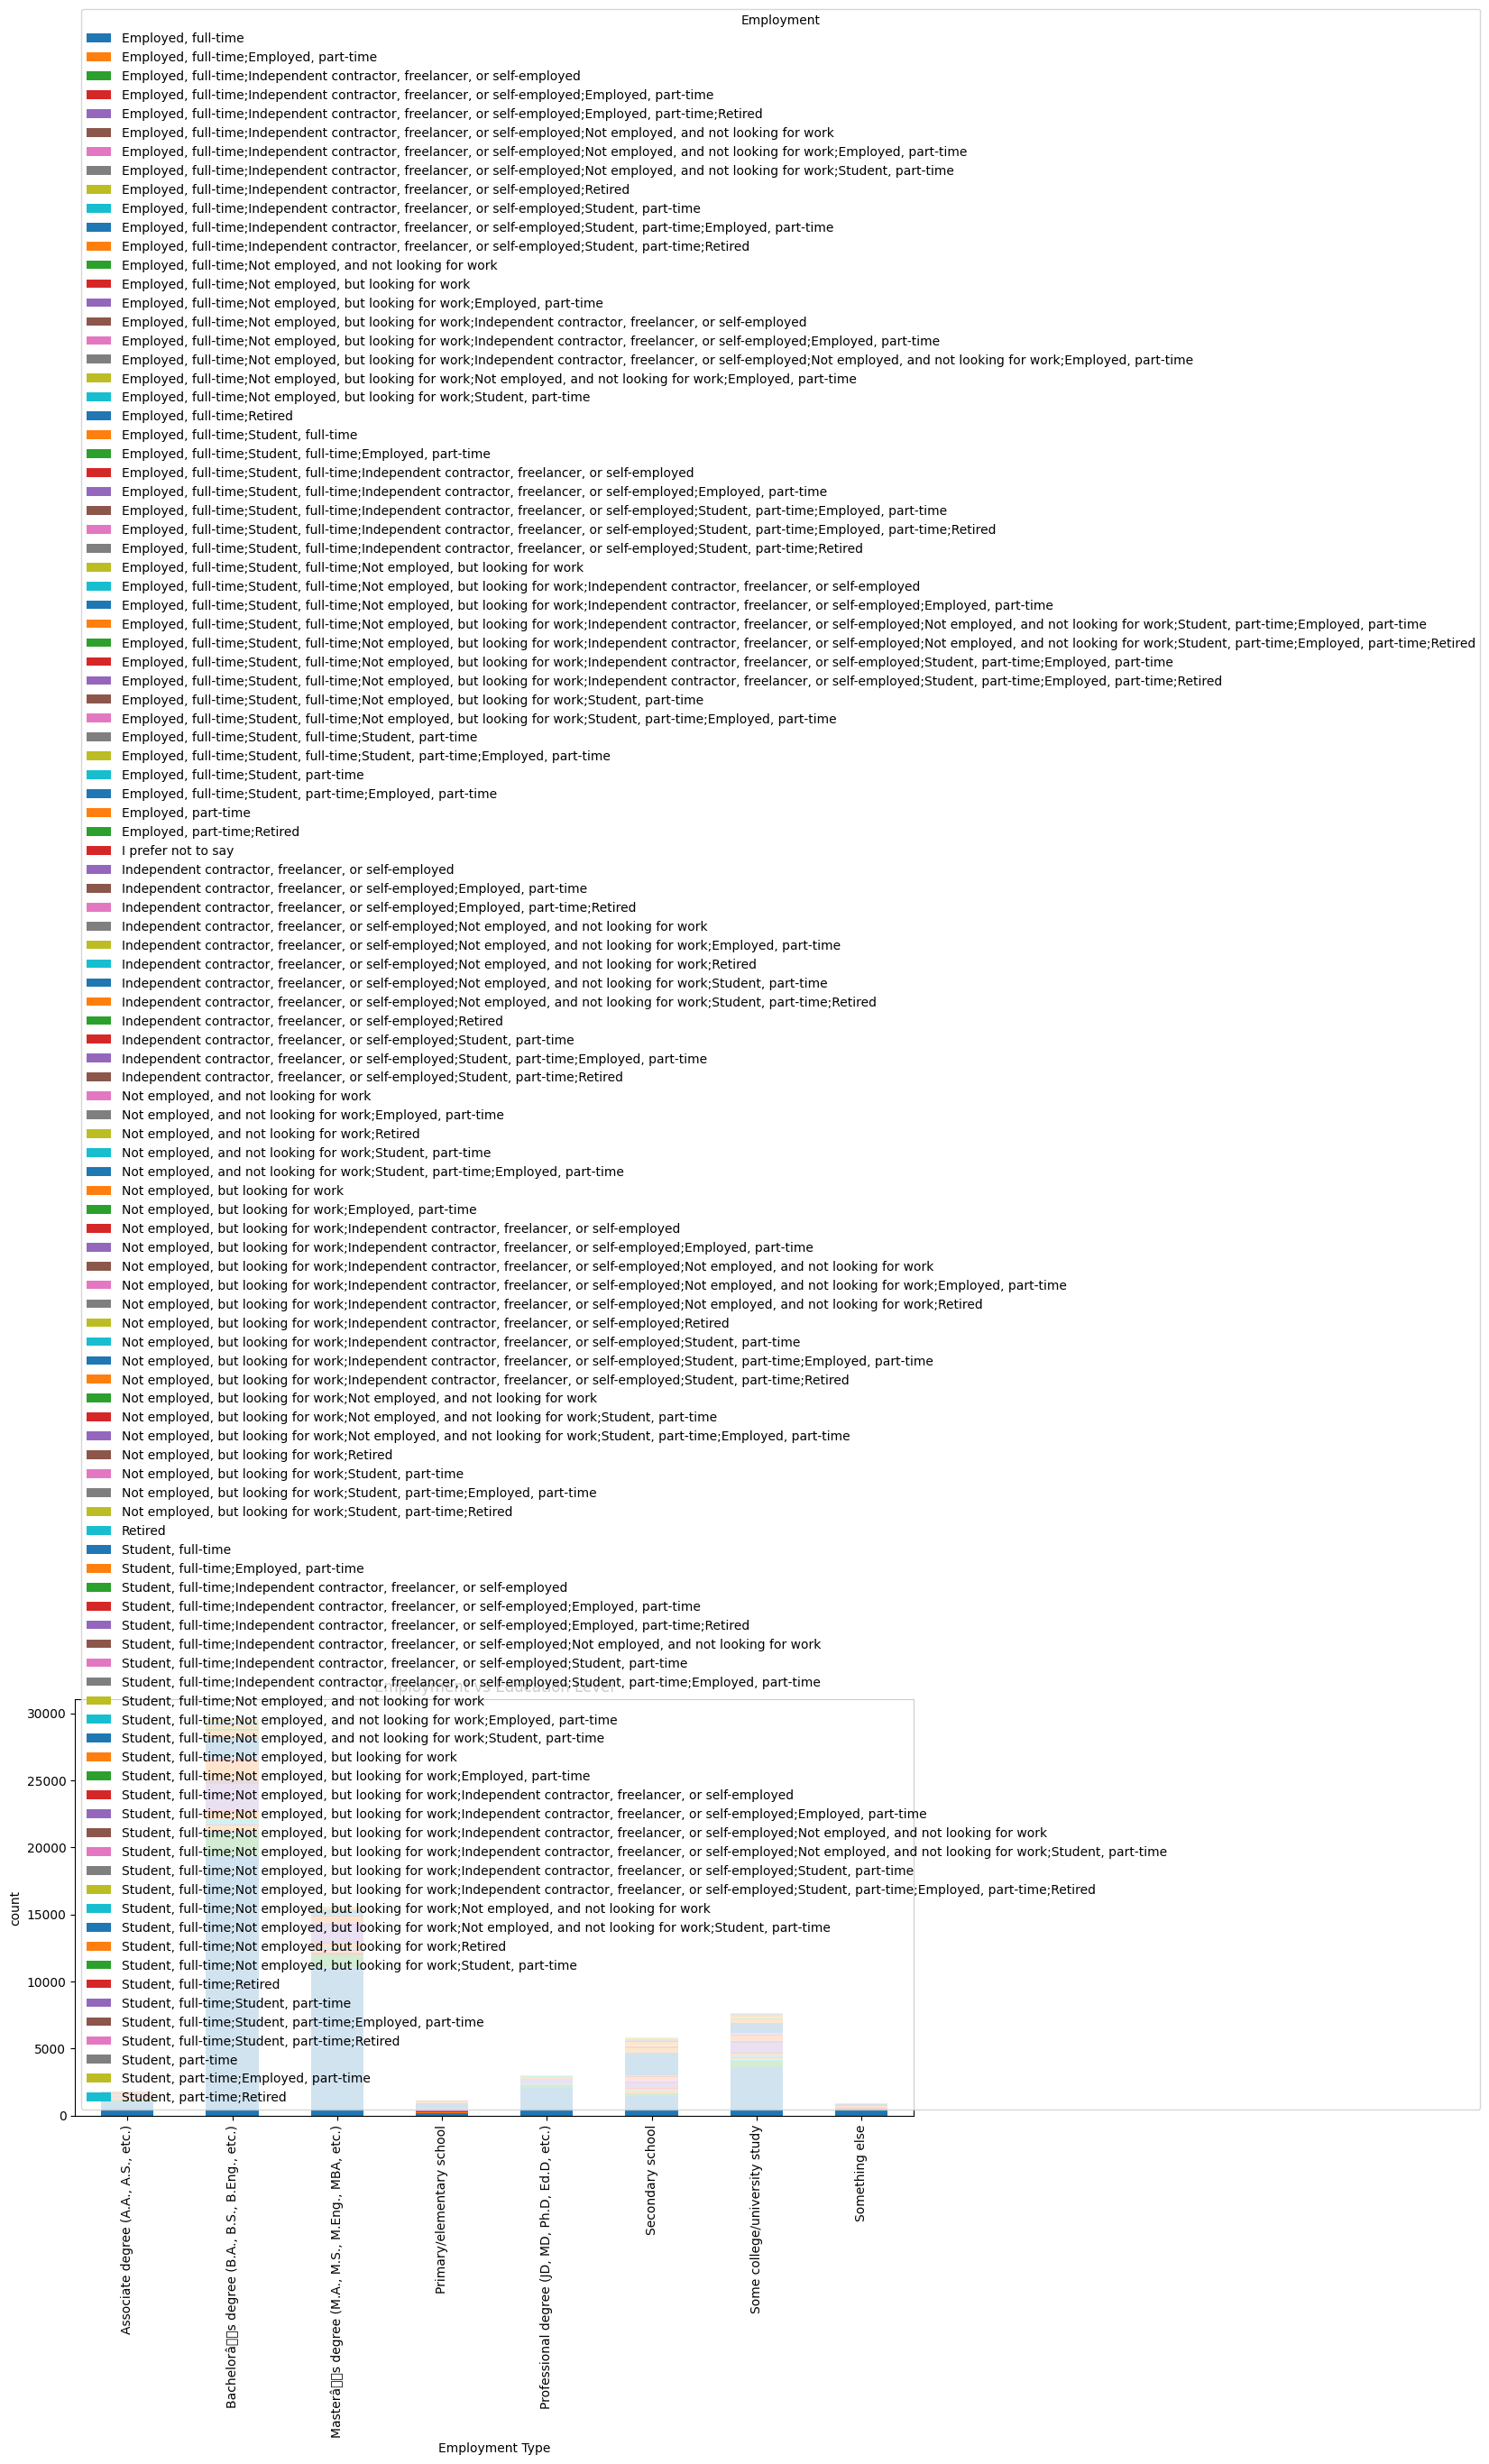

In [ ]:
ct = pd.crosstab(df['EdLevel'],df['Employment'])
print(ct)
ct.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('Employment vs Education Level')
plt.xlabel('Employment Type')
plt.ylabel("count")
plt.show()

In [ ]:
df.to_csv('cleaned_analyzed_survey.csv', index=False)

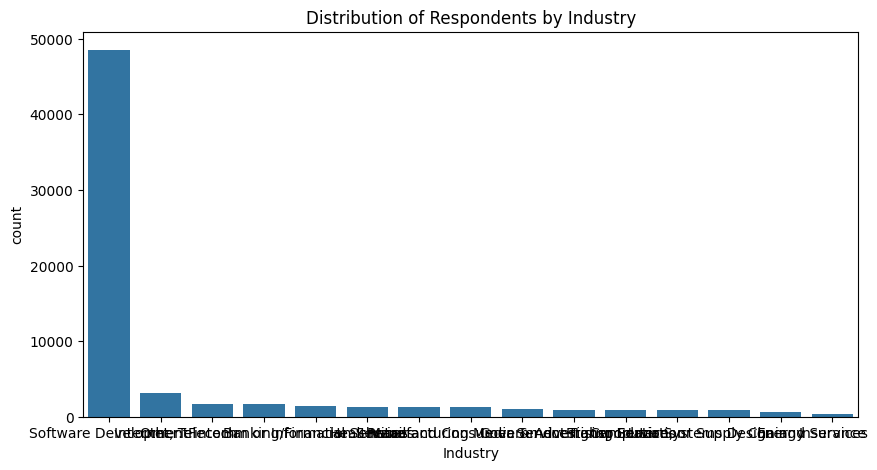

In [ ]:
# FINDING OUTLIERS
plt.figure(figsize=(10,5))
industry_counts = df['Industry'].value_counts()
sns.barplot(x=industry_counts.index,y=industry_counts.values)
plt.title("Distribution of Respondents by Industry")
plt.xlabel("Industry")
plt.ylabel("count")
plt.show()

In [ ]:
# Identifing High Compensation Outliers
comp = df['ConvertedCompYearly']
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()
print(f"mean:{mean_comp},median:{median_comp},std:{std_comp}")
# 
# Define outlier thresholds as mean + 3*std
threshold = mean_comp+ 3*std_comp
hogh_outliers = df[comp>threshold]
print(f"Number of high compensation outliers > threshold({threshold}):{len(hogh_outliers)}")
print(hogh_outliers[['ConvertedCompYearly']])

mean:72576.3582835399,median:65000.0,std:112220.68159721408
Number of high compensation outliers > threshold(409238.4030751821):194
       ConvertedCompYearly
529               650000.0
594               432000.0
828              1000000.0
920               500000.0
1081              500000.0
...                    ...
40188             429429.0
40288             438767.0
40373             644437.0
40952             750000.0
41027             700000.0

[194 rows x 1 columns]


IQR method - Lower bound:65000.0, Upper bound:65000.0
Number of outliers detected by IQR method: 23398
       ConvertedCompYearly
72                  7322.0
374                30074.0
379                91295.0
385                53703.0
389               110000.0
...                    ...
41180              44640.0
41184             170000.0
41185             116844.0
41186              12000.0
41187             222834.0

[23398 rows x 1 columns]


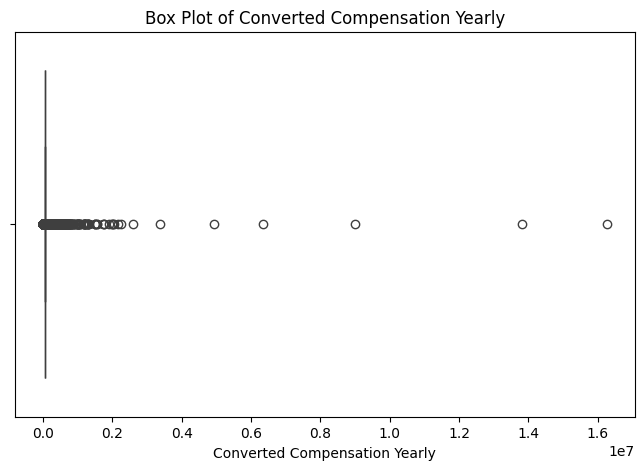

In [ ]:
# Detect outliers in compensation using IQR method
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR method - Lower bound:{lower_bound}, Upper bound:{upper_bound}")
iqr_coutliers = df[(comp<lower_bound) | (comp>upper_bound)]
print(f"Number of outliers detected by IQR method: {len(iqr_coutliers)}")
print(iqr_coutliers[['ConvertedCompYearly']])
# Box plot visualization
plt.figure(figsize=(8,5))
sns.boxplot(x=comp)
plt.title('Box Plot of Converted Compensation Yearly')
plt.xlabel('Converted Compensation Yearly')
plt.show()

In [ ]:
# Remove Outliers and create New DataFrame
df_no_outliers = df[(comp>= lower_bound) & (comp<= upper_bound)]
print(f"original df shape:{df.shape}, new df shape after removing outliers:{df_no_outliers.shape}")

original df shape:(65437, 229), new df shape after removing outliers:(42039, 229)


/var/folders/r4/p9whfw6x43b8g5m7n4qp05_c0000gn/T/ipykernel_17593/3693009380.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['AgeNumeric'] = df_no_outliers['Age'].apply(age_to_num)


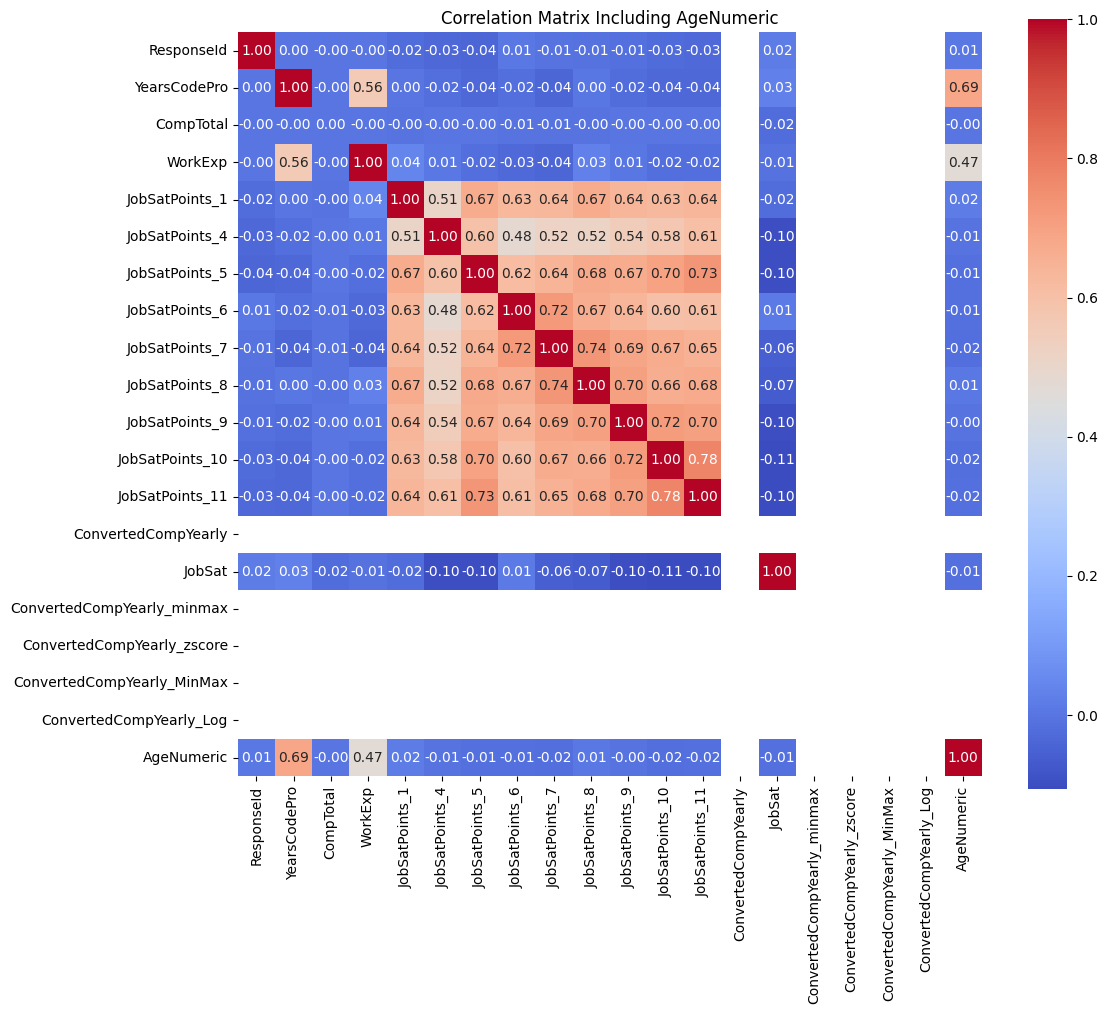

In [ ]:
# correlation analysis b/w age and compensation
 # Map Age to numeric approximate values assuming Age brackets are strings like '25-34 years'
def age_to_num(age_str):
    if pd.isnull(age_str):
        return None
    try:
        if '-' in age_str:
            parts = age_str.split('-')
            return (int(parts[0]) + int(parts[1].split()[0])) / 2
        elif '>' in age_str:
            return int(age_str[1:3]) + 5  # approx for '>54 years' = 59
        else:
            return float(age_str)
    except:
        return None

df_no_outliers['AgeNumeric'] = df_no_outliers['Age'].apply(age_to_num)

# Select numeric columns for correlation
num_cols = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Add AgeNumeric if not in num_cols
if 'AgeNumeric' not in num_cols:
    num_cols.append('AgeNumeric')

correlation_matrix = df_no_outliers[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Including AgeNumeric')
plt.show()


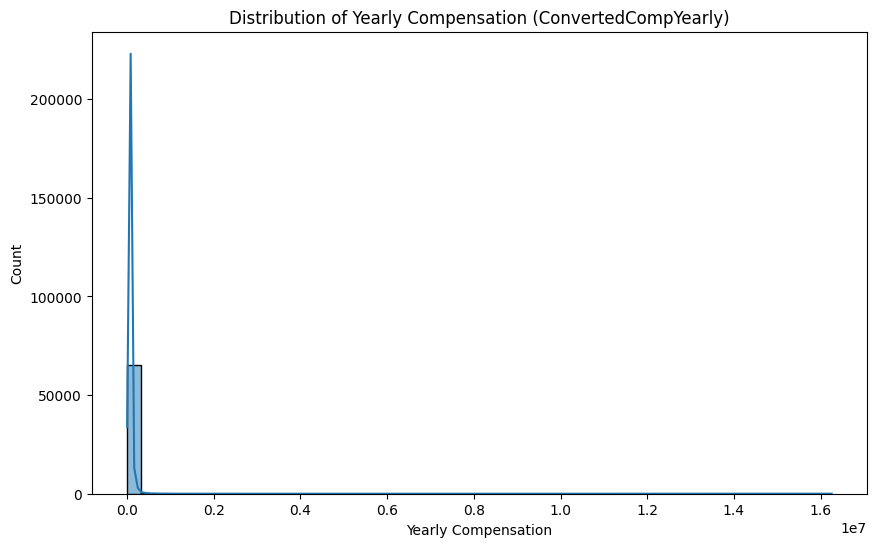

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedCompYearly'].dropna(), bins=50, kde=True)
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Count')
plt.show()


In [ ]:
full_time = df[df['Employment'] == 'Employed, full-time']
median_full_time_comp = full_time['ConvertedCompYearly'].median()
print(f"Median yearly compensation for full-time employees: {median_full_time_comp}")


Median yearly compensation for full-time employees: 65000.0


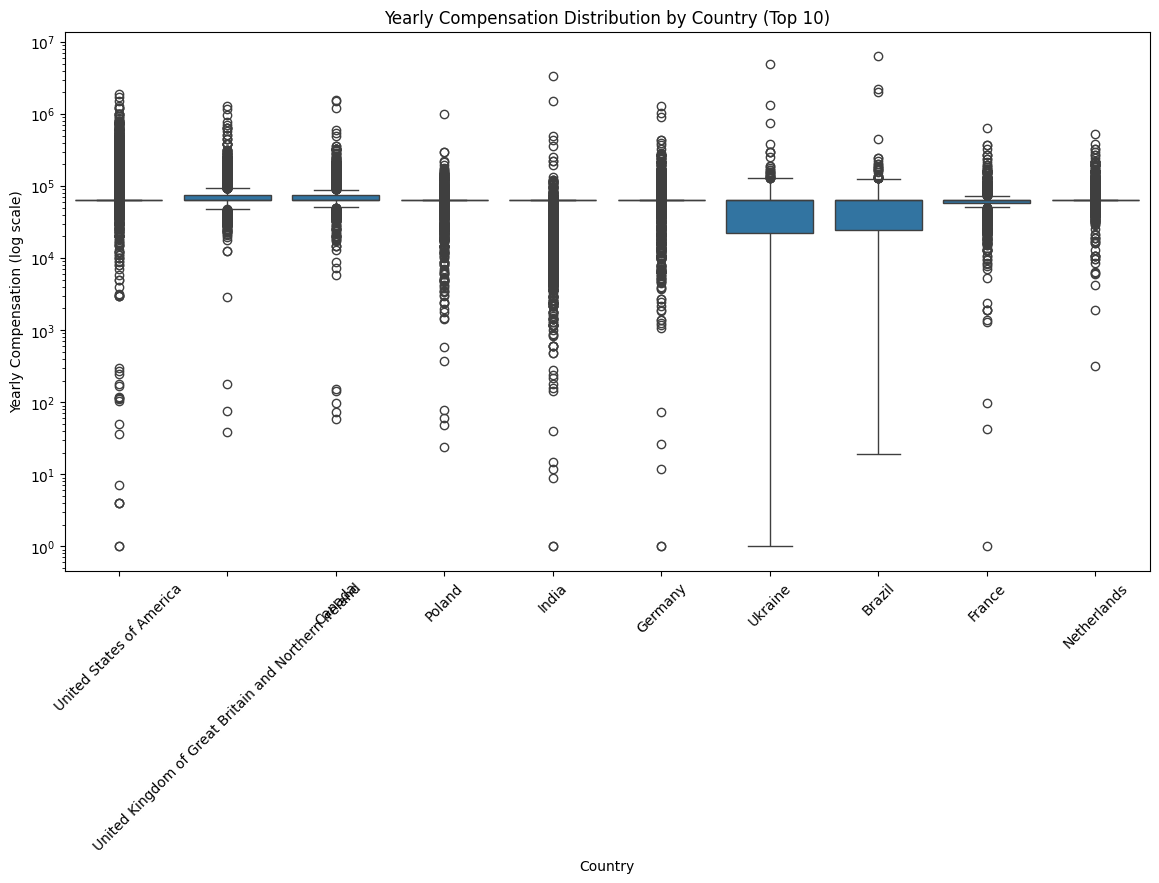

In [ ]:
plt.figure(figsize=(14,7))
# Choose top 10 countries with most respondents for clarity
top_countries = df['Country'].value_counts().nlargest(10).index
sns.boxplot(
    x='Country', y='ConvertedCompYearly', 
    data=df[df['Country'].isin(top_countries)]
)
plt.yscale('log')  # Use log scale for better visualization of spread
plt.title('Yearly Compensation Distribution by Country (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Yearly Compensation (log scale)')
plt.show()


In [ ]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_refined = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print(f"Original data size: {df.shape[0]}, Refined data size: {df_refined.shape[0]}")


Original data size: 65437, Refined data size: 42039


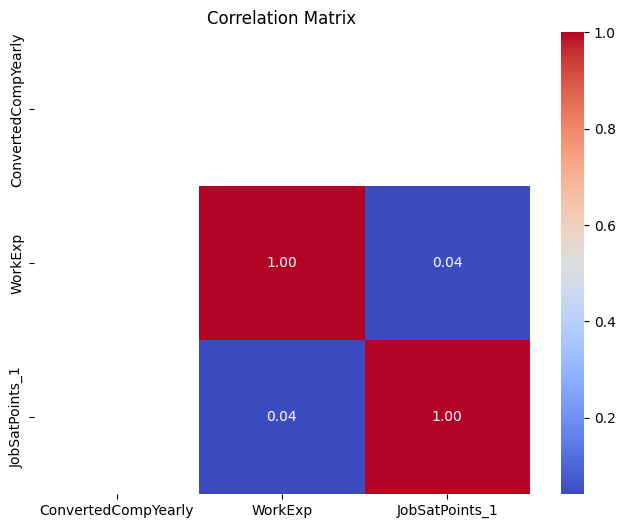

In [ ]:
# Ensure required columns are numeric and handle missing values
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
df_corr = df_refined[cols].dropna()

corr_matrix = df_corr.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


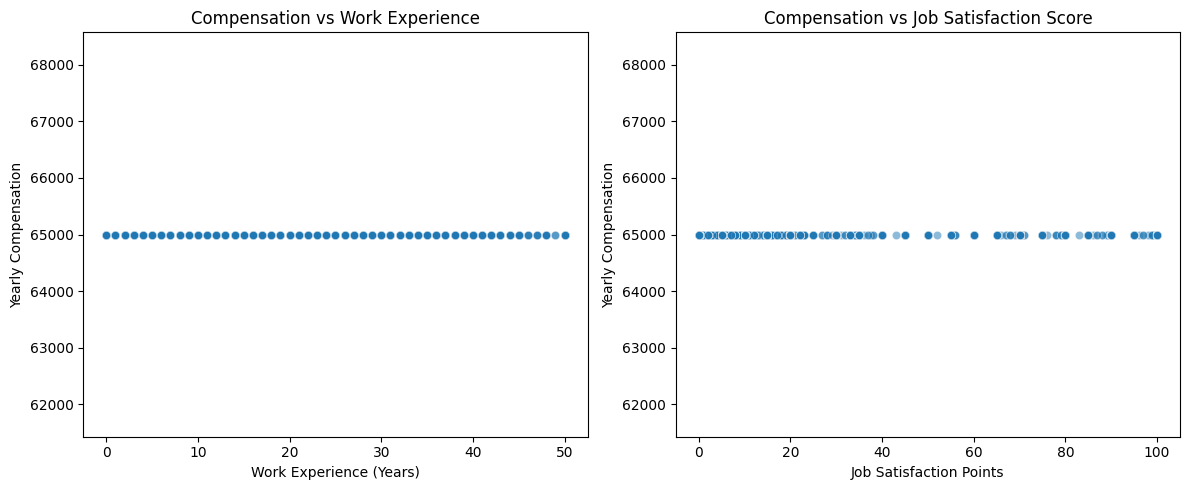

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df_corr, alpha=0.5)
plt.title('Compensation vs Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')

plt.subplot(1,2,2)
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df_corr, alpha=0.5)
plt.title('Compensation vs Job Satisfaction Score')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Yearly Compensation')

plt.tight_layout()
plt.show()


In [ ]:
print(df['ConvertedCompYearly'].median())

65000.0


Data Visualization

NameError: name 'df' is not defined